# Lecture 2 - Introduction to Social Media Analytics with Python

In this notebook we will learn the basics for analyzing  social media data with Python.  We will study tweets collected by keyword, tweets collected by user, and user profiles.  Some of the skills you will learn include searching and sorting dataframes and making bar and scatter plots.  For more details on the dataframe functions used in this notebook, you can look here: https://pandas.pydata.org/docs/index.html

This notebook can be opened in Colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zlisto/social_media_analytics/blob/main/Lecture02_BasicSocialMediaDataAnalysis.ipynb)

Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab.  This will save the notebook in your Google Drive.



# Clone GitHub Repository
This will clone the repository to your machine.  This includes the code and data files.  Then change into the directory of the repository.

In [1]:
!git clone https://github.com/zlisto/social_media_analytics

import os
os.chdir("social_media_analytics")

Cloning into 'social_media_analytics'...
remote: Enumerating objects: 638, done.
remote: Counting objects: 100% (203/203), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 638 (delta 103), reused 174 (delta 75), pack-reused 435
Receiving objects: 100% (638/638), 71.08 MiB | 7.55 MiB/s, done.
Resolving deltas: 100% (335/335), done.
Updating files: 100% (68/68), done.


## Install Requirements



In [2]:
pip install -q -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not ins

## Import packages

We import the packages we are going to use.  A package contains several useful functions that make our life easier.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#this option makes it so tweets display nicely in a dataframe
pd.set_option("display.max_colwidth", None)

#this code sets the font sizes for plots
plt.rcParams.update({'axes.labelsize': 18, 'xtick.labelsize': 14, 'ytick.labelsize': 14})



# Keyword Tweets

We begin with a set of tweets that contain a specific hashtag.  These were found using Twitter's Search API.  The tweets were saved in a csv (comma separated values) file called `"data/lecture_02_tweets.csv"`.  The filename is stored in the variable `fname`.   Each row
of this file is a tweet with many columns of information.  The most important columns are "created_at,screen_name,text".  





### Load Keyword Tweets
We load the tweets from the database using the `pd.read_csv` function. The tweets are loaded into a variable called **df** which is a *dataframe*.  Dataframes store each tweet as a row and let us access the rows and columns easily.  We will use dataframes a lot.

In [4]:
#filename of csv file
fname = 'data/lecture_02_tweets.csv'
df = pd.read_csv(fname)

### Look at the tweets using head() function
After we load the tweets in `df`, we look at the first few tweets using the `head` function.  We can specify how many rows to show using the `n` parameter.



In [5]:
df.head(n=2)

,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo,entities
0,2022-01-07T23:58:24.000Z,DoraineGenius,Hong Kong NFT start-ups jockey to become the next Bored Apes and CryptoPunks in an increasingly crowded field\n@luckykittensnft #Metaverse #BoredApeYachtClub #NewNFT\n\n#Ethereum #bitcoin\n#cryptonews #NFTnews #NFTs #NFTartists #nftcollector #nftgallery #NFTs #cryptoart #Cryptos https://t.co/b0maPJirBV,en,1,0,4,0,1479603356083658753,1308840519234138114,1479603356083658753,NaN,NaN,"{'urls': [{'start': 276, 'end': 299, 'url': 'https://t.co/b0maPJirBV', 'expanded_url': 'https://twitter.com/DoraineGenius/status/1479603356083658753/photo/1', 'display_url': 'pic.twitter.com/b0maPJirBV'}], 'hashtags': [{'start': 127, 'end': 137, 'tag': 'Metaverse'}, {'start': 138, 'end': 156, 'tag': 'BoredApeYachtClub'}, {'start': 157, 'end': 164, 'tag': 'NewNFT'}, {'start': 166, 'end': 175, 'tag': 'Ethereum'}, {'start': 176, 'end': 184, 'tag': 'bitcoin'}, {'start': 185, 'end': 196, 'tag': 'cryptonews'}, {'start': 197, 'end': 205, 'tag': 'NFTnews'}, {'start': 206, 'end': 211, 'tag': 'NFTs'}, {'start': 212, 'end': 223, 'tag': 'NFTartists'}, {'start': 224, 'end': 237, 'tag': 'nftcollector'}, {'start': 238, 'end': 249, 'tag': 'nftgallery'}, {'start': 250, 'end': 255, 'tag': 'NFTs'}, {'start': 256, 'end': 266, 'tag': 'cryptoart'}, {'start': 267, 'end': 275, 'tag': 'Cryptos'}], 'mentions': [{'start': 110, 'end': 126, 'username': 'luckykittensnft', 'id': '1449251281848213505'}]}"
1,2022-01-07T23:54:41.000Z,MrLegendaryAPE,"I think head bands in @BoredApeYC are super under valued.\n\nI'm not sure if anyone realizes this.\nBut the head band says\n (""Godly Winds"")\n\nIf that's not cool I don't know what is.\n\nRandom? Or purposeful?\n\n@BoredApeYC\n#MAYC #BAYC\n#BoredApeYachtClub #BoredApeYC #MutantApeYachtClub https://t.co/e3NWZZAgyN",en,0,5,9,0,1479602421311553536,1424343723563913223,1479602421311553536,NaN,NaN,"{'urls': [{'start': 279, 'end': 302, 'url': 'https://t.co/e3NWZZAgyN', 'expanded_url': 'https://twitter.com/MrLegendaryAPE/status/1479602421311553536/photo/1', 'display_url': 'pic.twitter.com/e3NWZZAgyN'}], 'hashtags': [{'start': 216, 'end': 221, 'tag': 'MAYC'}, {'start': 222, 'end': 227, 'tag': 'BAYC'}, {'start': 228, 'end': 246, 'tag': 'BoredApeYachtClub'}, {'start': 247, 'end': 258, 'tag': 'BoredApeYC'}, {'start': 259, 'end': 278, 'tag': 'MutantApeYachtClub'}], 'mentions': [{'start': 22, 'end': 33, 'username': 'BoredApeYC', 'id': '1381699264011771906'}, {'start': 204, 'end': 215, 'username': 'BoredApeYC', 'id': '1381699264011771906'}]}"


### Select Columns of Dataframe

Sometimes we just want to look at a few columns of the dataframe.  We can do this by putting the names of the columns we want into a *list*.  In Python, lists have the format `[item_1,item_2,...,item_n]`.  

In [6]:
cols = ['screen_name','text']
df[cols].head(n=12)

,screen_name,text
0,DoraineGenius,Hong Kong NFT start-ups jockey to become the next Bored Apes and CryptoPunks in an increasingly crowded field\n@luckykittensnft #Metaverse #BoredApeYachtClub #NewNFT\n\n#Ethereum #bitcoin\n#cryptonews #NFTnews #NFTs #NFTartists #nftcollector #nftgallery #NFTs #cryptoart #Cryptos https://t.co/b0maPJirBV
1,MrLegendaryAPE,"I think head bands in @BoredApeYC are super under valued.\n\nI'm not sure if anyone realizes this.\nBut the head band says\n (""Godly Winds"")\n\nIf that's not cool I don't know what is.\n\nRandom? Or purposeful?\n\n@BoredApeYC\n#MAYC #BAYC\n#BoredApeYachtClub #BoredApeYC #MutantApeYachtClub https://t.co/e3NWZZAgyN"
2,ke1lerr,"This was me until I met the @_cryptoapes family now I'm out here spending 7 hours straight with them chattin and crapeing on spaces! #BoredApeYachtClub and #cryptopunks communities have been successfully united already, many more to come :) #CRAPES https://t.co/O9pdAwoRZm"
3,InfiniteDodos,First community AMA announcing 4 functional DAOS at mint was exciting!! \n\nDiscord is open 🔓\n\nhttps://t.co/Nf7EhfJyYj\n\nMore announced soon! \n\n#NFT #opensea #NFTGiveaway #eth #DAO #BoredApeYachtClub
4,__jiri,Cryptos are down but #NFTs are up! Are you selling for a profit or holding?\n\n#LazyLionsNFT #BAYC #boredapeyachtclub #CyberKongz #Cryptopunks #Fidenza #veefriends #NFTCollector #NFTNews #nftcommunity #cryptonft #nftcollector #NFTart #cryptoart https://t.co/UaZOaFx5Xv
5,nft_tracker,Sold! Bored Ape was purchased by sadsigns_vault for Ξ69.0 ($222k) $ETH #NFT #NFTs #art #cryptoart @BoredApeYC #BAYC #BoredApeYachtClub https://t.co/PS0eTxJUj1
6,kxngoftheether,𝕿𝖍𝖊 𝕶𝖝𝖓𝖌 𝖔𝖋 𝖙𝖍𝖊 𝕰𝖙𝖍𝖊𝖗 𝖍𝖆𝖘 𝖗𝖎𝖘𝖊𝖓!!!\n#nft #nfts #nftart #nftcollector #cryptoart #ethereum #polygon #blockchain #Solana #boredapeyachtclub #cryptopunks #nftcommunity #rarible #opensea #nftcollectibles #digitalart #mint #minting #discord #ipfs #erc721 https://t.co/fM0c4oRbX0
7,metaverseunited,"🌴NEW Rare Bored Apes Minted NOW!🦧\n🔥SELLING FAST🔥\n🚀Get in NOW,take advantage of the Floor Price\n\nOpensea: https://t.co/6QS6MbHtyU\n\n#NFTCommmunity #NFTGiveaway #NFTdrop #NFTartists #nftcollectors #Metaverse #crypto #Bitcoin #Ethereum #opensea #BoredApeYachtClub #APENFT https://t.co/vtVBYdt199"
8,thehightablenft,One Lucky Person That Mints A HighTable NFT Will Be Awarded 1 Pound Of Top Shelf Flowers 🔥💨 + All NFT Holders Will Be Granted 1 Quater Of Top Shelf Flowers Every Two Weeks ! #nft #NFTs #NFTCommunity #NFTGame #nftcollectors #opensea #BoredApeYachtClub #NFTdrop #NFTCollection https://t.co/ltH52FH5L7
9,DavillinNFTs,MINTING YOUR NFTs\n\nhttps://t.co/T5YZLKo8rR\n\n#NFTs #NFTCommunity #NFTGame #NFTdrop #NFTGiveaways #cryptopunks #BoredApeYachtClub #cryptocurrency #Twitter #ETH #Ethereum


### Sample Rows of Dataframe

The `head` function will give the first few rows of the dataframe.  We can use the `sample` function to randomly sample a fixed number of rows.

In [7]:
df[ ['screen_name','text']].sample(n=2)

,screen_name,text
3153,n0mayd,Brown Punk NFT\n👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻\n\nhttps://t.co/10YF665P6g\n\n#NFT #nftart #NFTCommunity #NFTartist #NFTs #nftcollector #NftCryptoArt #NFTCREATORS #brownpunk #NFT #CryptoPunk #BoredApeYachtClub
1753,UbuQuichotte,Zombie Ape #206 from our new collection. https://t.co/YD7VoSlq4A #new #nft #BoredApeYachtClub #MutantApeYachtClub https://t.co/XeJILiGdB1


### Search for Tweets Containing Keywords

We can search for tweets in the dataframe which contains a specific keyword.  We do this with the `contains` function.  This function takes the keyword as input in the form of a string (this means you put the word inside quotes).  It also has a parameter `case` which is `True` if you want to match the case of the keyword.



In [8]:
keyword = 'eminem'
ind = df.text.str.contains(keyword, case = False)
cols = ['screen_name','text']

df[ind][cols].sample(n=5)


,screen_name,text
2441,moon_patriot1,@apebayc @machinegunkelly get on #TribeQuokka for a #RivalNFTs to @Eminem and #BoredApeYachtClub
4684,NFTWannaBs,@Eminem becoming a bored ape whats next @Drake becoming an NFTWannaB? Come on support a fellow Canadian 🙏😂😂😂 \n#NFTs #BoredApeYachtClub
4211,TraderHac,@Eminem @britneyspears Please check my NFT listing. Open to negotiate for a good price 😊 https://t.co/ahCexTLAid #OpenSea #BAYC #BoredApeYachtClub #MAYC #NFT #NFTcollection
4614,PrinceGersie,Save over $100 if you buy this listing now! @Coingecko in partnership with @GoGalaGames \n\n#NFT #Opensea #NFTGiveaway #nftcollector #NFTCommunity #NFTGame #PlayToEarn @TownStarGame #OpenSeaNFT #OpenSeaNTF #BoredApeYachtClub #Crypto $Eth $BTC $Sol $BNB #Eminem $XRP $GALA #erc20gas https://t.co/vxycH4u6ZM
2227,cryptscp,#NFTIndustryNews #BoredApeYachtClub Eminem Purchases BAYC NFT Coined ‘EminApe’ https://t.co/r70s39RmPq NFTs: https://t.co/nBUFvon3KU https://t.co/owjjxffiNW


### Add Column to Dataframe

We can add a column to the dataframe to make data analysis easier.  Let's add a column called `"has_keyword"` which is `True` if the tweet has the word "eminem".  This can be done by doing `df["has_keyword"] = column you want to add`.  In our case, the column we want to add is given by `df.text.str.contains(keyword, case = False)`.


In [9]:
keyword = 'eminem'
ind = df.text.str.contains(keyword, case = False)
df['has_keyword'] = ind
cols = ['screen_name','text','has_keyword']

df[cols].head()

,screen_name,text,has_keyword
0,DoraineGenius,Hong Kong NFT start-ups jockey to become the next Bored Apes and CryptoPunks in an increasingly crowded field\n@luckykittensnft #Metaverse #BoredApeYachtClub #NewNFT\n\n#Ethereum #bitcoin\n#cryptonews #NFTnews #NFTs #NFTartists #nftcollector #nftgallery #NFTs #cryptoart #Cryptos https://t.co/b0maPJirBV,False
1,MrLegendaryAPE,"I think head bands in @BoredApeYC are super under valued.\n\nI'm not sure if anyone realizes this.\nBut the head band says\n (""Godly Winds"")\n\nIf that's not cool I don't know what is.\n\nRandom? Or purposeful?\n\n@BoredApeYC\n#MAYC #BAYC\n#BoredApeYachtClub #BoredApeYC #MutantApeYachtClub https://t.co/e3NWZZAgyN",False
2,ke1lerr,"This was me until I met the @_cryptoapes family now I'm out here spending 7 hours straight with them chattin and crapeing on spaces! #BoredApeYachtClub and #cryptopunks communities have been successfully united already, many more to come :) #CRAPES https://t.co/O9pdAwoRZm",False
3,InfiniteDodos,First community AMA announcing 4 functional DAOS at mint was exciting!! \n\nDiscord is open 🔓\n\nhttps://t.co/Nf7EhfJyYj\n\nMore announced soon! \n\n#NFT #opensea #NFTGiveaway #eth #DAO #BoredApeYachtClub,False
4,__jiri,Cryptos are down but #NFTs are up! Are you selling for a profit or holding?\n\n#LazyLionsNFT #BAYC #boredapeyachtclub #CyberKongz #Cryptopunks #Fidenza #veefriends #NFTCollector #NFTNews #nftcommunity #cryptonft #nftcollector #NFTart #cryptoart https://t.co/UaZOaFx5Xv,False


### Count Rows in Dataframe

We can use the `len` function to find out how many rows a dataframe has.  Let's find out how many tweets contain our keyword, and then print out the result. We can use the column we just created for this to make the code cleaner.

In [10]:
cols = ['screen_name','text']
ind = df['has_keyword']==True
df_keyword = df[ind][cols]

#the len function tells you how many rows in a dataframe
n_keyword = len(df_keyword)

print(f"There are {n_keyword} tweets that contain the keyword '{keyword}' ")

There are 164 tweets that contain the keyword 'eminem' 


### Sort Rows By Column Values
We can sort a dataframe's rows by the values in a column with the `sort_value` function.  It takes as input a list of columns, and an optional parameter `ascending` which can be `True` or `False`.

Let's sort the tweets in order of decreasing `retweet_count`.

In [11]:
cols  =['retweet_count','screen_name','text']
df.sort_values(by = ['retweet_count'], ascending = False)[cols].head(n=5)

,retweet_count,screen_name,text
960,1589,NFTmagzine,"#Sheepzy died for all of the #Crypto #BoredApe #BAYC #MAYC #MutantApeYachtClub #BoredApeYachtClub and #CryptoPunks Sins\n\nThe answer to all things is love❤️‍🔥❤️‍🔥❤️‍🔥❤️‍🔥❤️‍🔥❤️‍🔥❤️‍🔥 #SHEEPZYS\n\n“So if the Son sets you free, you will be free indeed” John 8:36✝️\n🐑🐑🐑🐑🐑🐑🐑🐑🐑🐑🐑🐑🐑 https://t.co/IJ4poCtV7J"
2738,830,NFTPirate_,🥳#NFTGiveaway🥳\n\n🎁Giving away 1 Bored Ape Crypto Paint #NFT! \n\n1️⃣Follow @BACryptoPaint &amp; @BoredApeBC\n2️⃣❤️&amp; RT\n3️⃣Tag Friends\n\n⏰Ends in 48 hrs \n\n#NFTCommunity #NFTGiveaways #NFTs #nftcollectors #nftart #OpenSeaNFT \n#BoredApeYachtClub #ETH https://t.co/RiTboK2AKH
3025,825,Eliza_Nft,🥳#NFTGiveaway🥳\n\n🎁Giving away 1 Bored Ape Crypto Paint #NFT! \n\n1️⃣Follow @BACryptoPaint &amp; @BoredApeBC\n2️⃣❤️&amp; RT\n3️⃣Tag Friends\n\n⏰Ends in 48 hrs \n\n#NFTCommunity #NFTGiveaways #NFTs #nftcollectors #nftart #OpenSeaNFT \n#BoredApeYachtClub https://t.co/HJG4hAStEr
4190,662,themonsterguild,🎁🎁 48 HR GIVEAWAY 🎁🎁\n\nReceive this FREE MAYC #28474 derivative:\n\nApeworks #325\n\n1⃣ Like\n2⃣ Retweet\n3⃣ Follow me\n4⃣ Tag 3 NEW friends\n\nYou HAVE to follow me to win.\n\nEnds Jan 3 @ 8 pm PT\n\nSee more: https://t.co/ysml6oP8YG\n\n#BoredApeYachtClub #nftgiveaways #MAYC #nftgiveaway https://t.co/RP8k0kIM9f
3479,520,BoredApeBC,🥳#NFTGiveaway🥳\n\nOne dope Bored Ape Crypto Paint #NFT\n\n1⃣Follow @BACryptoPaint and @BoredApeBC\n2⃣Retweet\n3⃣Tag 2 friends\n\n#NFTCommunity #NFTGiveaways #NFTs #NFTCollectors #NFTArtist #OpenSeaNFT \n#BoredApeYachtClub https://t.co/362g8GW7Vm


### Statistics of Columns

There are built-in functions in a dataframe to calculate many different statistis, such as `mean`, `median`, `variance`, `std`, and `quantile`.  For `quantile` we need to set the quantile we want in the variable `q`.

In [12]:
mean = df['retweet_count'].mean()
med = df['retweet_count'].median()
std = df['retweet_count'].std()
q = 0.9
quant = df['retweet_count'].quantile(q)

print(f"Retweet count\n\tmean = {mean:.2f}\n\tmedian = {med:.2f}\n\tst. dev. = {std}\n\t{q:.2f} quantile = {quant}\n")

Retweet count
	mean = 2.87
	median = 0.00
	st. dev. = 34.737457027884005
	0.90 quantile = 2.0



# User Profiles

We next look at a table of user profiles.   These were saved in a csv (comma separated values) file called `"data/lecture_02_profiles.csv"`.  The filename is stored in the variable `fname`.   Each row
of this file is a user profile.

### Load User Profiles
We load the user profiles from the database using the `DB.fetch` function. The profiles are loaded into a dataframe called **df_u**.

In [13]:
#filename of csv file
fname = "data/lecture_02_profiles.csv"

df_u = pd.read_csv(fname)

print(f"We have {len(df_u)} user profiles")
df_u.head()

We have 5 user profiles


,created_at,name,screen_name,description,id,location,followers_count,following_count,listed_count,tweet_count
0,2021-04-12T20:02:42.000Z,Bored Ape Yacht Club,BoredApeYC,"To become a member, buy a Bored Ape or Mutant Ape on OpenSea. https://t.co/tGx2Lgsf4W\n\nDiscord: https://t.co/2Z7jqjX0z1\nCreated by @yugalabs",1.381700e+18,The Swamp,478884,5077,2919,3629
1,2017-12-28T02:57:47.000Z,OpenSea,opensea,"The largest NFT marketplace. Buy, sell, & discover the internet of goods. Get help at https://t.co/f3KCJaxqBz, or join the community on Discord: https://t.co/HZM49J1NT0",9.462140e+17,"New York, NY",942331,1885,6758,6009
2,2019-08-10T16:13:42.000Z,Rarible,rarible,"Multi-chain community-centric NFT marketplace. Create, sell and collect digital items. Anything is possible. All are welcome 💛 Links: https://t.co/pwgEU3QMBw",1.160220e+18,🌈,334084,3404,3457,4471
3,2021-12-24T15:17:44.000Z,TrillionaireNFTS,TrillonaireNFTs,Turning thousands into trillions through NFTs. A collection of jaw droping artwork that will make you look trice.,1.474400e+18,metaverse,2551,5,4,14
4,2009-03-05T16:33:48.000Z,Marshall Mathers,Eminem,NaN,2.294022e+07,Detroit,22534616,0,53740,1115


### Bar Graph of Follower Count

We can make a bar graph of the follower count of the users.  To make the plot, we use the `barplot` function in the *seaborn* package.  Details on the seaborn package can be found here: https://seaborn.pydata.org/#

To use `barplot`, we need to input the `data`, which is the dataframe, `x`, which is the name of the column for the x-axis, and `y`, which is the name of the column for the y-axis.  There are many other functions that let us edit the plot to make it look nice.  These are from the *matplotlib* package.  One parameter is the `color` parameter.  A complete list of colors is found here: https://matplotlib.org/stable/gallery/color/named_colors.html

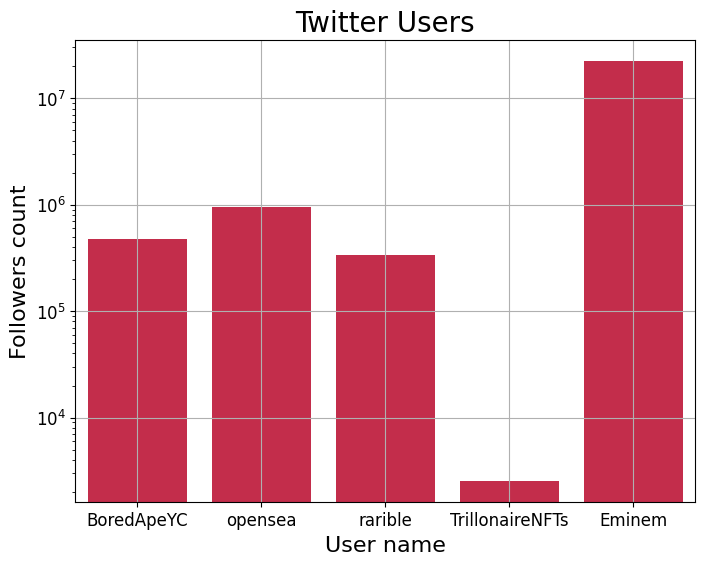

In [14]:
fig = plt.figure(figsize = (8,6))
sns.barplot(data = df_u, x = 'screen_name', y = 'followers_count',
           color = 'crimson')
plt.xlabel('User name', fontsize = 16)
plt.ylabel('Followers count', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Twitter Users", fontsize = 20)
plt.grid()
plt.yscale("log")
plt.show()

# User Tweets

The tweets here were collected from the Twitter timelines of a set of users. They are stored in the csv file `"data/lecture_02_usertweets.csv"`

### Load User Tweets

We can load the user tweets with the `pd.read_csv` function into a dataframe called `df_ut` (ut for user tweets).

In [15]:
#filename of csv file
fname = 'data/lecture_02_usertweets.csv'
df_ut = pd.read_csv(fname)
print(f"We have {len(df_ut)} user tweets")
df_ut.sample(n=5)



We have 3402 user tweets


,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo
1791,2021-11-20T16:22:06.000Z,opensea,Twitter spaces strikes again - rugged 👀,en,27,238,636,7,1462093907190243330,946213559213555712,1462093907190243330,NaN,None
2593,2021-11-04T19:00:02.000Z,rarible,We're live on Twitter Spaces with @milalolli @VectorMeldrew @missalsimpson @dustmonkey_ and @HollyWoodNFTs talking about @NFT_LDN! ✨ \n\nTune in: \nhttps://t.co/cQghKcGGZZ,en,6,14,65,0,1456335444744998915,1160222700104757249,1456335444744998915,NaN,None
238,2021-12-19T18:45:00.000Z,BoredApeYC,RT @LindseyByrnes: #NewProfilePic https://t.co/NPpylQFPCO,und,79,0,0,0,1472639115824881668,1381699264011771906,1472639115824881668,NaN,None
2416,2021-12-02T10:20:36.000Z,rarible,RT @nonfungiblelux: BULLISH\n\n#raribleontezos @tezos @rarible https://t.co/UFbJrmDkPA,en,20,0,0,0,1466351588763738113,1160222700104757249,1466351588763738113,NaN,None
3346,2020-05-31T01:55:37.000Z,Eminem,I’m with @killermike on this one. Incredibly well done. https://t.co/zeTQYqyk9H,en,9765,918,66136,540,1266911177688350723,22940219,1266911177688350723,NaN,None


### Group Tweets

We can group the tweets using the `groupby` function.  Once we group the tweets, we can calculate apply other functions to tweets in the group, such as `mean`.  We do this for the `retweet_count` column.

In [16]:
df_ut.groupby('screen_name').mean()



<ipython-input-16-96f5af2282a4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ut.groupby('screen_name').mean()


,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id
screen_name,,,,,,,,
BoredApeYC,124.068244,9.302093,108.936306,3.618744,1.464450e+18,1.381699e+18,1.464450e+18,1.194489e+18
Eminem,5518.810526,1053.678947,37084.584211,766.400000,1.333806e+18,2.294022e+07,1.333805e+18,3.361061e+08
TrillonaireNFTs,418.285714,416.642857,454.928571,116.642857,1.476982e+18,1.474399e+18,1.476979e+18,1.377484e+18
opensea,115.584167,134.103731,179.563239,5.386715,1.465770e+18,9.462136e+17,1.465763e+18,9.212699e+17
rarible,29.650000,29.016000,74.770000,2.435000,1.448659e+18,1.160223e+18,1.448329e+18,8.630221e+17


### Barplot Retweet Count of Groups

We can make a barplot of a column value on the y-axis, and the group on the x-axis.  Seaborn knows to group together tweets in the same group, and plot the mean value along with error bars. In this case, we will plot `retweet_count` on the y-axis, and the groups are the `screen_name` column.

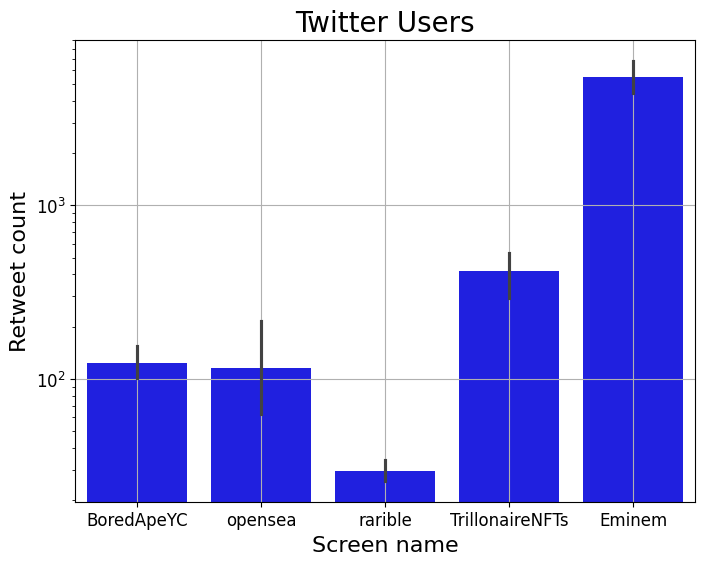

In [17]:
fig = plt.figure(figsize = (8,6))
sns.barplot(data = df_ut, x = 'screen_name', y = 'retweet_count', color = "blue")
plt.xlabel('Screen name', fontsize = 16)
plt.ylabel('Retweet count', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Twitter Users", fontsize = 20)
plt.grid()
plt.yscale("log")
plt.show()


### Subplots

We can plot two figures side by side using the `subplot` function.  You need to specify the number of rows and columns in your subplot grid, and specify which grid box the plot goes in.  It is something like this: `subplot(rows, columns, box_number)`.


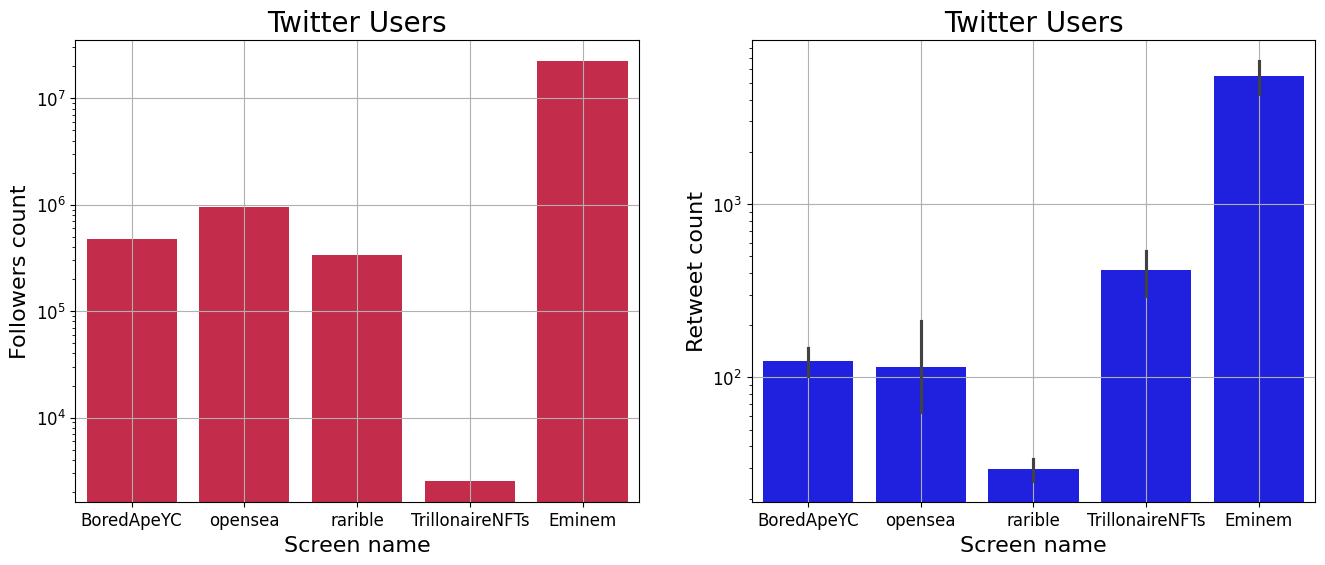

In [18]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.barplot(data = df_u, x = 'screen_name', y = 'followers_count',
           color = 'crimson')
plt.xlabel('Screen name', fontsize = 16)
plt.ylabel('Followers count', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Twitter Users", fontsize = 20)
plt.grid()
plt.yscale("log")

plt.subplot(1,2,2)
sns.barplot(data = df_ut, x = 'screen_name', y = 'retweet_count', color = "blue")
plt.xlabel('Screen name', fontsize = 16)
plt.ylabel('Retweet count', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Twitter Users", fontsize = 20)
plt.grid()
plt.yscale("log")



plt.show()

### Compare Retweet Count of Tweets Containing Different Keywords

We can compare the retweet count of tweets that contain a keyword versus those that do not.  We do this by defining the variable `keyword` which is the keyword we care about, and then adding a column to the dataframe called `has_keyword_{keyword}` that is `True` if the tweet has the word.  The `{keyword}` means the column name will have the actual keyword, which makes things easier to analyze.  We can then plot the retweet count grouped by screen name, and separate within the group those where `has_keyword_{keyword}` is `True` and `False`.  We use the `hue` parameter for this in-group separation.

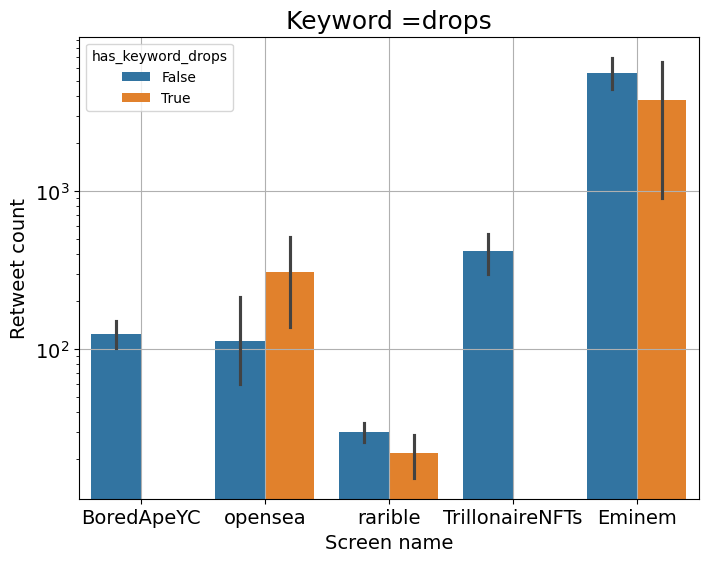

In [19]:
keyword = 'drops'
ind = df_ut.text.str.contains(keyword, case = False)
df_ut[f'has_keyword_{keyword}'] = ind

fig = plt.figure(figsize = (8,6))
sns.barplot(data = df_ut, x = 'screen_name', y = 'retweet_count',
                hue = f'has_keyword_{keyword}')
plt.xlabel('Screen name',fontsize  = 14)
plt.ylabel('Retweet count',fontsize  = 14)
plt.title(f"Keyword ={keyword}",fontsize = 18)
plt.yscale('log')
plt.grid()
plt.show()

### Describe Groups

We can group the tweets by `screen_name` and `has_keyword` using the `groupby` function.  Then we can summarize the statistics of the groups in a dataframe by using the `describe` function.

In [20]:
print(f"Keyword is {keyword}")
cols = ['screen_name',f'has_keyword_{keyword}']
df_ut.groupby(cols)[['retweet_count']].describe()

Keyword is drops


retweet_count                            \
                                          count         mean          std   
screen_name     has_keyword_drops                                           
BoredApeYC      False                    1099.0   124.068244   415.553516   
Eminem          False                     188.0  5537.675532  8692.083925   
                True                        2.0  3745.500000  4024.144692   
TrillonaireNFTs False                      14.0   418.285714   236.813925   
opensea         False                    1085.0   113.103226  1546.156799   
                True                       14.0   307.857143   367.119108   
rarible         False                     985.0    29.768528    67.400176   
                True                       15.0    21.866667    13.922575   

                                                                             
                                     min      25%     50%      75%      max  
screen_name     has_keyword_drops                                            
BoredApeYC      False                0.0    15.00    28.0    69.00   6213.0  
Eminem          False              392.0  1496.75  2648.5  5184.75  68467.0  
                True               900.0  2322.75  3745.5  5168.25   6591.0  
TrillonaireNFTs False                2.0   232.00   441.0   572.00    731.0  
opensea         False                0.0    15.00    33.0    63.00  50789.0  
                True                 1.0    37.00   107.5   614.75   1063.0  
rarible         False                0.0     5.00    13.0    29.00   1008.0  
                True                 0.0    15.00    25.0    27.00     48.0

# Save Notebook to PDF

Click File -> Print and save the notebook as a PDF file. You can submit your homework this way.

# Save Notebook to HTML and then PDF

To make your file look nice, you can convert it to an HTML first, and then print to a PDF.  Here is how.

1) Save the notebook and download it to your local machine.

2) Drag the notebook into the `social_media_analytics` folder.

3) Run the code below, making sure you put in the filename of your notebook.  You can get the filename by right-clicking on the notebook in the files directory and "Copy path".

4) Download the html file.

5) Open the html file in a web browser, then print to a PDF.

In [ ]:
!jupyter nbconvert --to html "file path"

[NbConvertApp] Converting notebook /content/social_media_analytics/Copy of Lecture02_BasicSocialMediaDataAnalysis.ipynb to html
[NbConvertApp] Writing 890213 bytes to /content/social_media_analytics/Copy of Lecture02_BasicSocialMediaDataAnalysis.html
